In [40]:
%%HTML
<style>.container { width:100% !important; }</style>

In [13]:
#load data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import Imputer
# read data and provide DataFrame
melbourne_data = pd.read_csv('./melb_data.csv')
# select features and labels
y = melbourne_data.Price
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_predictors]
#preprocess data
my_imputer = Imputer()
imputed_X = my_imputer.fit_transform(X)
X = pd.DataFrame(imputed_X, columns=X.columns)
#split dataset
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Measuring error (metrics)
http://scikit-learn.org/stable/modules/model_evaluation.html

## Decision tree
http://scikit-learn.org/stable/modules/tree.html

In [11]:
%%HTML
<iframe width="854" height="480" src="https://www.youtube.com/embed/eKD5gxPPeY0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

In [14]:
from sklearn.tree import DecisionTreeRegressor
# Define model
tree_model = DecisionTreeRegressor()
# Fit model
tree_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = tree_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

274882.92360838153


In [16]:
tree_model.fit(train_X, train_y)
print("Making predictions for the following 5 houses:")
print(val_X.head())
print("The predictions are")
predicted_home_prices = tree_model.predict(val_X.head())
print(predicted_home_prices)
print("Real values are")
print(val_y.head().as_matrix())
print("Error:", mean_absolute_error(val_y.head(), predicted_home_prices))

Making predictions for the following 5 houses:
       Rooms  Bathroom  Landsize  BuildingArea    YearBuilt  Lattitude  \
3008     1.0       1.0       0.0     42.000000  1970.000000  -37.87840   
9189     2.0       1.0     308.0    151.220219  1965.879996  -37.79080   
5053     5.0       3.0      98.0    151.220219  1965.879996  -37.78430   
8264     3.0       3.0     506.0    195.000000  2000.000000  -37.80500   
15373    4.0       2.0     785.0    151.220219  1965.879996  -37.85297   

       Longtitude  
3008    144.98640  
9189    144.87170  
5053    144.89390  
8264    144.94480  
15373   145.23815  
The predictions are
[ 451000.  650000.  930000. 1575000. 1214000.]
Real values are
[ 340000.  705000. 1000000. 1260000.  850000.]
Error: 183000.0


/home/artem/.virtualenvs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [17]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  376610
Max leaf nodes: 50  		 Mean Absolute Error:  280628
Max leaf nodes: 500  		 Mean Absolute Error:  257667
Max leaf nodes: 5000  		 Mean Absolute Error:  269649


## Random Forest
http://scikit-learn.org/stable/modules/ensemble.html#random-forests

In [18]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
print(forest_model)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
227352.7596081369


In [19]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

218411.75402604655


## Gradient boosting regression
http://scikit-learn.org/stable/modules/ensemble.html#regression

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 0.05,}
#params = {'n_estimators': 100, 'max_depth': 8, 'min_samples_split': 0.05, 'subsample': 0.8, 'max_features': 'sqrt', 'min_samples_leaf': 50,}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(train_X, train_y)
gbr_preds = gbr_model.predict(val_X)
print(mean_absolute_error(val_y, gbr_preds))

230864.60732162194


## XGBoost
Leader of Kaggle competitions
```
pip install xgboost
```
[Parameters description](http://xgboost.readthedocs.io/en/latest//parameter.html)

[Scikit-Learn API](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

In [22]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(**params)
xgb_model.fit(train_X, train_y)
xgb_preds = xgb_model.predict(val_X)
print(mean_absolute_error(val_y, xgb_preds))

217948.45564932594


## LightGBM
Much faster than XGBoost
```
pip install lightgbm
```
[Explanation](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/)

[Scikit-Learn API](http://lightgbm.readthedocs.io/en/latest/Python-API.html#scikit-learn-api)

In [24]:
from lightgbm import LGBMRegressor
lgb_model = LGBMRegressor()
lgb_model.fit(train_X, train_y)
lgb_preds = lgb_model.predict(val_X)
print(mean_absolute_error(val_y, lgb_preds))

218555.58648548656


In [25]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'Deviance')

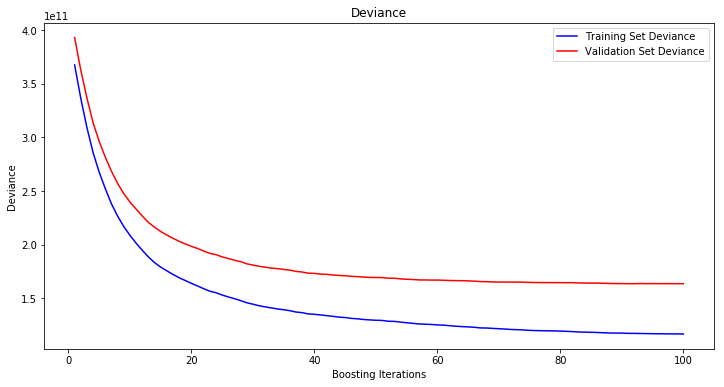

In [26]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr_model.staged_predict(val_X)):
    test_score[i] = gbr_model.loss_(val_y, y_pred)

plt.figure(figsize=(12, 6))
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr_model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Validation Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

## Feature importance

The feature of tree-based algorithms.

In [27]:
# Plot feature importance
def plotFeatureImportance(feature_importance, column_names):
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(12, 6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, column_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

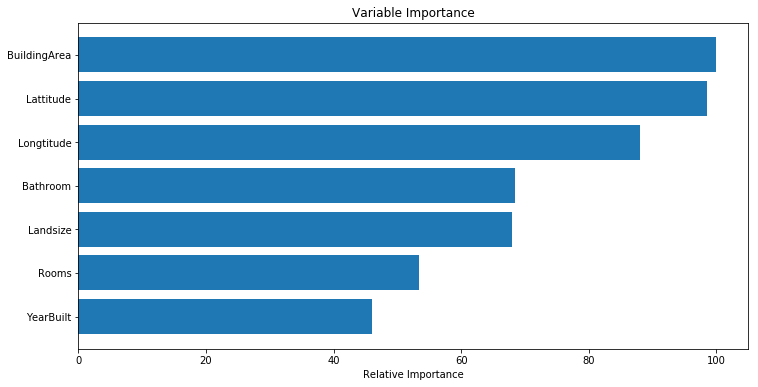

In [28]:
plotFeatureImportance(gbr_model.feature_importances_, train_X.columns)

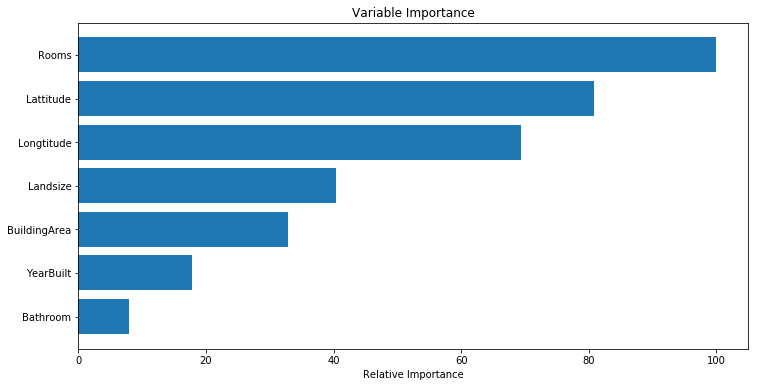

In [29]:
plotFeatureImportance(tree_model.feature_importances_, train_X.columns)

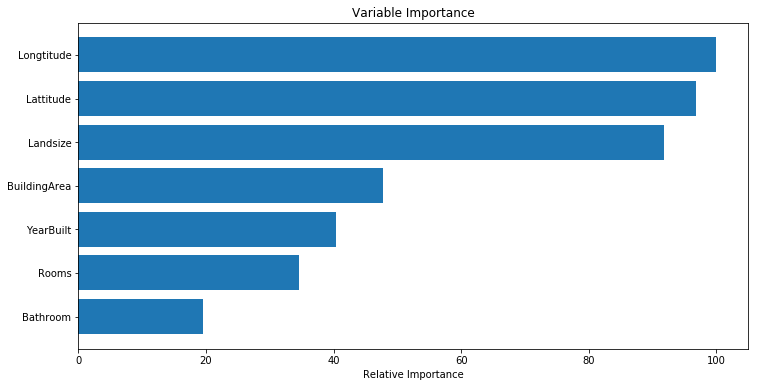

In [37]:
plotFeatureImportance(xgb_model.feature_importances_, train_X.columns)

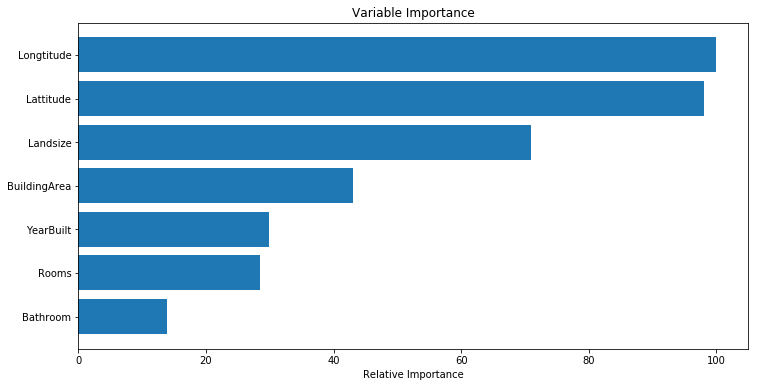

In [38]:
plotFeatureImportance(lgb_model.feature_importances_, train_X.columns)

## Feature engineering

Important part of solving ML problem. It is the art of choosing right features and creating new features using domain knowledge and statistical math.
Simple examples:
- you know linear dimensions - add area column
- you know date - add age column
- try to split continuous data to categorical values ([small, medium, high])
- split date to components ([day_of_week, day_of_month, hour_of_day])

In [31]:
#so lets add age column
print(X.head().YearBuilt)
newX = X.rename(columns={'YearBuilt': 'Age'}).astype({'Age': 'int32'})
newX.Age = 2018 - newX.Age
print(newX.head().Age)
#print(melbourne_data.head().Car)
#newX = newX.join(melbourne_data.Car)
#newX = newX.drop('Bathroom', axis = 1)
print(newX.columns)
#split to train/test
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(newX, y, random_state = 0)
#run
new_xgb_model = XGBRegressor(**params)
new_xgb_model.fit(new_train_X, new_train_y)
new_xgb_preds = new_xgb_model.predict(new_val_X)
print(mean_absolute_error(new_val_y, new_xgb_preds))

0    1965.879996
1    1900.000000
2    1900.000000
3    1965.879996
4    2014.000000
Name: YearBuilt, dtype: float64
0     53
1    118
2    118
3     53
4      4
Name: Age, dtype: int32
Index(['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'Age', 'Lattitude',
       'Longtitude'],
      dtype='object')
217398.75069648292


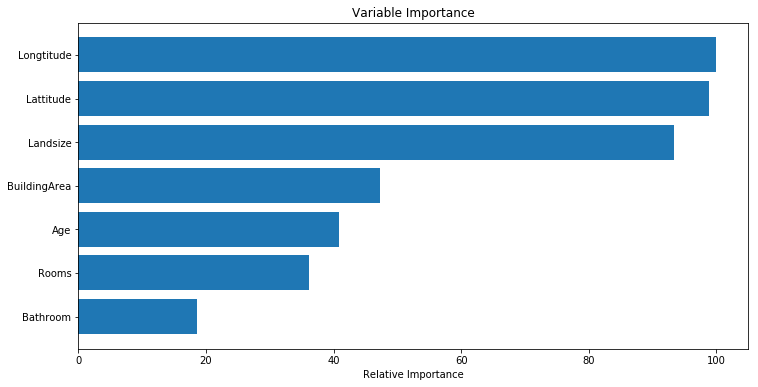

In [32]:
plotFeatureImportance(new_xgb_model.feature_importances_, new_train_X.columns)

In [33]:
#try to add categorized Region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(melbourne_data.Regionname.describe())
classifiedRegions = le.fit_transform(melbourne_data.Regionname.astype('str'))
newX['Region'] = classifiedRegions
print(newX.columns)
#split to train/test
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(newX, y, random_state = 0)
#run
new_xgb_model = XGBRegressor(**params)
new_xgb_model.fit(new_train_X, new_train_y)
new_xgb_preds = new_xgb_model.predict(new_val_X)
print(mean_absolute_error(new_val_y, new_xgb_preds))

count                     18395
unique                        8
top       Southern Metropolitan
freq                       6343
Name: Regionname, dtype: object
Index(['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'Age', 'Lattitude',
       'Longtitude', 'Region'],
      dtype='object')
204813.3156120896


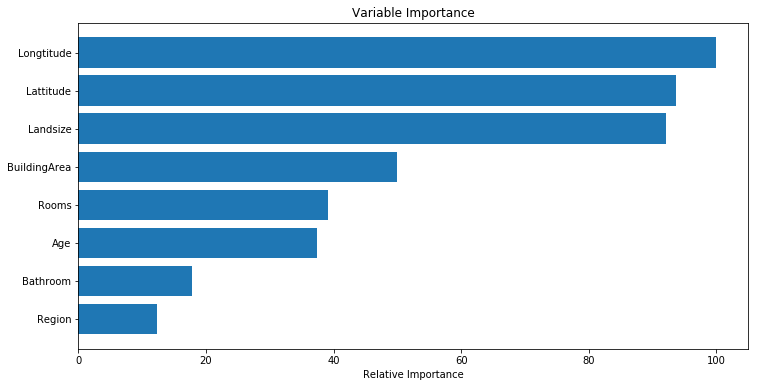

In [34]:
plotFeatureImportance(new_xgb_model.feature_importances_, new_train_X.columns)

## Save/load trained models

[Very simple](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#model-persistence)

In [42]:
import pickle
#save
savedAsString = pickle.dumps(new_xgb_model)
#load
loadedModel = pickle.loads(savedAsString)
#use
predictions = loadedModel.predict(new_val_X)
print(mean_absolute_error(new_val_y, predictions))

204813.3156120896
